# final plots for group 
- baseline only (ses-1)
- focus on affect (ANF/ANTS/VNNNB)
- look at images from mv for inspiration

In [117]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

def load_task_data(task_name, relevant_columns, root_dir="../../../data"):
    """
    Loads all subject CSVs corresponding to a specified task, extracts relevant columns, 
    and appends them (with the subject ID as the first column) into one DataFrame.
    
    Parameters:
        task_name (str): The name of the task folder (e.g., "AF", "NTS", "DWL").
        relevant_columns (list): A list of column names (strings) to extract from each CSV.
        root_dir (str): The root data directory. Default is "Data".
        
    Returns:
        pandas.DataFrame: A DataFrame containing the subject ID (as 'subjectID') and the relevant columns 
                          from every CSV that was found.
    """
    # List to collect dataframes for each subject
    data_frames = []
    
    # Loop through each study directory in the root directory
    for study in os.listdir(root_dir):
        study_path = os.path.join(root_dir, study)
        if os.path.isdir(study_path):
            # Loop through each site directory within the study directory
            for site in os.listdir(study_path):
                site_path = os.path.join(study_path, site)
                if os.path.isdir(site_path):
                    # Loop through each subject directory within the site directory
                    for subject in os.listdir(site_path):
                        subject_path = os.path.join(site_path, subject)
                        if os.path.isdir(subject_path):
                            # Construct the path to the task directory for this subject
                            task_path = os.path.join(subject_path, task_name)
                            if os.path.isdir(task_path):
                                # Look for the 'data' folder within the task directory
                                data_folder = os.path.join(task_path, "data")
                                if os.path.isdir(data_folder):
                                    # Process each CSV file found in the data folder
                                    for file in os.listdir(data_folder):
                                        # if file ends with .csv and second part of the filename is 'ses-1'
                                        if file.endswith(".csv") and file.split('_')[1] == 'ses-1':
                                            csv_path = os.path.join(data_folder, file)
                                            print(f"Processing {csv_path}")
                                            try:
                                                # Load the CSV into a temporary DataFrame
                                                temp_df = pd.read_csv(csv_path)
                                                # Select only the relevant columns (if they exist)
                                                # It is assumed that every CSV contains all desired columns; 
                                                # you may wish to add error handling if some files do not.
                                                filtered_df = temp_df[relevant_columns].copy()
                                                # Insert the subject ID as the first column
                                                filtered_df.insert(0, "subjectID", subject)
                                                # Append the DataFrame for this subject to the list
                                                data_frames.append(filtered_df)
                                            except Exception as e:
                                                print(f"Error processing {csv_path}: {e}")
                                            finally:
                                                # Delete the temporary dataframe to free memory
                                                del temp_df
                                                del filtered_df
                                        
    # Concatenate all subject DataFrames into one, resetting the index
    if data_frames:
        final_df = pd.concat(data_frames, ignore_index=True)
    else:
        # If no data was found, return an empty DataFrame with the appropriate columns
        final_df = pd.DataFrame(columns=["subjectID"] + relevant_columns)
    
    return final_df



In [97]:
columns = ['response_time', 'condition', 'correct']
af_data = load_task_data("AF", columns)
af_data

Processing ../../../data/obs/UI/7049/AF/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/AF/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/AF/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/AF/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/AF/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/AF/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/AF/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/AF/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/AF/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/AF/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/AF/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/AF/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/AF/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/AF/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/AF/data/7090_ses-1_cat-1.csv
Processing

,subjectID,response_time,condition,correct
0,7049,609,inc,1
1,7049,540,con,1
2,7049,640,inc,1
3,7049,523,con,1
4,7049,594,con,1
...,...,...,...,...
10891,9002,683,inc,1
10892,9002,657,con,1
10893,9002,1130,con,1
10894,9002,607,inc,1


In [98]:
nf_data = load_task_data("NF", columns)
nf_data


Processing ../../../data/obs/UI/7049/NF/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/NF/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/NF/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/NF/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/NF/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/NF/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/NF/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/NF/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/NF/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/NF/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/NF/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/NF/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/NF/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/NF/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/NF/data/7090_ses-1_cat-1.csv
Processing

,subjectID,response_time,condition,correct
0,7049,1336,con,1
1,7049,1402,inc,1
2,7049,819,inc,1
3,7049,614,con,1
4,7049,615,inc,1
...,...,...,...,...
11019,9002,611,inc,1
11020,9002,881,inc,1
11021,9002,660,con,1
11022,9002,710,inc,1


In [99]:
# calculate mean RT for each subject in AF by condition
af_mean_rt = af_data.groupby(['subjectID', 'condition'])['response_time'].mean().reset_index()
af_mean_rt.head()

,subjectID,condition,response_time
0,7019,con,558.541667
1,7019,inc,580.888889
2,7020,con,443.847222
3,7020,inc,456.152778
4,7021,con,609.194444


In [100]:
# calculate mean RT for each subject in NF by condition
nf_mean_rt = nf_data.groupby(['subjectID', 'condition'])['response_time'].mean().reset_index()
nf_mean_rt.head()

,subjectID,condition,response_time
0,7019,con,590.111111
1,7019,inc,592.611111
2,7020,con,432.262500
3,7020,inc,436.400000
4,7021,con,574.777778


In [101]:
# calculate mean and 95% CI for AF by condition
def calculate_mean_ci(data, group_col, value_col):
    """
    Calculate mean and 95% confidence interval for a given DataFrame.
    
    Parameters:
        data (pandas.DataFrame): The input DataFrame.
        group_col (str): The column to group by.
        value_col (str): The column to calculate the mean and CI for.
        
    Returns:
        pandas.DataFrame: A DataFrame with the mean and CI for each group.
    """
    summary = data.groupby(group_col)[value_col].agg(
        mean=lambda x: np.mean(x),
        ci=lambda x: 1.96 * np.std(x) / np.sqrt(len(x))
    ).reset_index()
    
    return summary
# Calculate mean and 95% CI for AF
af_summary = calculate_mean_ci(af_mean_rt, 'condition', 'response_time')
af_summary.head()

,condition,mean,ci
0,con,641.365954,27.717639
1,inc,670.708278,26.515501


In [102]:
nf_summary = calculate_mean_ci(nf_mean_rt, 'condition', 'response_time')
nf_summary.head()

,condition,mean,ci
0,con,616.406630,23.701239
1,inc,638.268352,23.032278


     condition        mean         ci
0    Congruent  641.365954  27.717639
1  Incongruent  670.708278  26.515501
     condition        mean         ci
0    Congruent  616.406630  23.701239
1  Incongruent  638.268352  23.032278


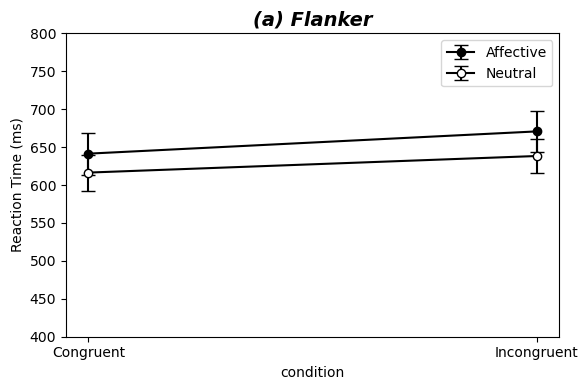

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure consistent condition formatting and ordering
order = ['Congruent','Incongruent']
# map inc / con to Incongruent / Congruent in both summaries
af_summary['condition'] = af_summary['condition'].replace({'con': 'Congruent', 'inc': 'Incongruent'})
nf_summary['condition'] = nf_summary['condition'].replace({'con': 'Congruent', 'inc': 'Incongruent'})

# Sort both DataFrames
af_summary = af_summary.sort_values('condition')
nf_summary = nf_summary.sort_values('condition')
print(af_summary)
print(nf_summary)

# Plot
plt.figure(figsize=(6, 4))

# Affective line (black filled circles)
plt.errorbar(af_summary['condition'], af_summary['mean'], yerr=af_summary['ci'],
             fmt='o-', color='black', ecolor='black', capsize=5, label='Affective')

# Neutral line (white circles)
plt.errorbar(nf_summary['condition'], nf_summary['mean'], yerr=nf_summary['ci'],
             fmt='o-', markerfacecolor='white', markeredgecolor='black', color='black',
             ecolor='black', capsize=5, label='Neutral')

plt.title('(a) Flanker', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.xlabel('condition')
plt.ylabel('Reaction Time (ms)')
plt.ylim(400, 800)
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
columns = ['block', 'condition', 'correct', 'response_time']
nnb_data = load_task_data("NNB", columns)
vnb_data = load_task_data("VNB", columns)


Processing ../../../data/obs/UI/7049/NNB/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/NNB/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/NNB/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/NNB/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/NNB/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/NNB/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/NNB/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/NNB/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/NNB/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/NNB/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/NNB/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/NNB/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/NNB/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/NNB/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/NNB/data/7090_ses-1_cat-1

In [107]:
# mean response_time by condition for both
# Calculate mean and 95% CI for NNB
nnb_summary = calculate_mean_ci(nnb_data, 'condition', 'response_time')
# Calculate mean and 95% CI for VNB
vnb_summary = calculate_mean_ci(vnb_data, 'condition', 'response_time')
nnb_summary.head()
vnb_summary.head()


,condition,mean,ci
0,1-Back,1327.214395,36.020016
1,2-Back,1798.622644,53.650940


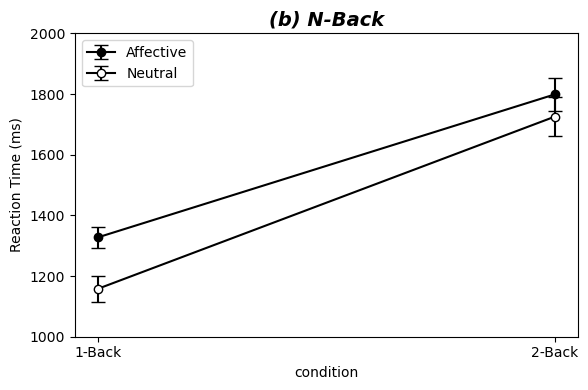

In [111]:
# Plot
plt.figure(figsize=(6, 4))

# Affective line (black filled circles)
plt.errorbar(vnb_summary['condition'], vnb_summary['mean'], yerr=vnb_summary['ci'],
             fmt='o-', color='black', ecolor='black', capsize=5, label='Affective')

# Neutral line (white circles)
plt.errorbar(nnb_summary['condition'], nnb_summary['mean'], yerr=nnb_summary['ci'],
             fmt='o-', markerfacecolor='white', markeredgecolor='black', color='black',
             ecolor='black', capsize=5, label='Neutral')

plt.title('(b) N-Back', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.xlabel('condition')
plt.ylabel('Reaction Time (ms)')
plt.ylim(1000, 2000)
plt.legend()
plt.tight_layout()
plt.show()

Processing ../../../data/obs/UI/7049/PC/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/PC/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/PC/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/PC/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/PC/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/PC/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/PC/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/PC/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/PC/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/PC/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/PC/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/PC/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/PC/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/PC/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/PC/data/7090_ses-1_cat-1.csv
Processing

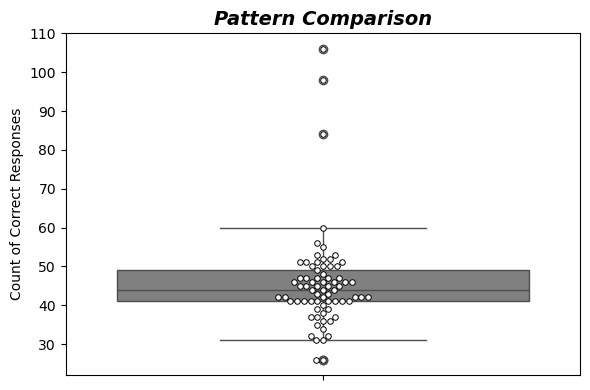

In [126]:
columns = ['correct']
pc_df = load_task_data("PC", columns)
# plot count correct responses by individual for pc
# Count correct responses for each subject
pc_counts = pc_df.groupby('subjectID')['correct'].sum().reset_index()
# plot a box plot of pc_counts
plt.figure(figsize=(6, 4))
sns.boxplot(y=pc_counts['correct'], color='grey')
# Add swarm plot to show individual data points with marker as o with white fill and black edge
sns.swarmplot(
    y=pc_counts['correct'], 
    color='white', 
    edgecolor='black', 
    linewidth=0.7,     # make the edge stand out
    s=4              # control marker size if needed
)
plt.title('Pattern Comparison', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.ylabel('Count of Correct Responses')
plt.tight_layout()
plt.show()

Processing ../../../data/obs/UI/7049/LC/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/LC/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/LC/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/LC/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/LC/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/LC/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/LC/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/LC/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/LC/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/LC/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/LC/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/LC/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/LC/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/LC/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/LC/data/7090_ses-1_cat-1.csv
Processing

<Figure size 600x400 with 0 Axes>

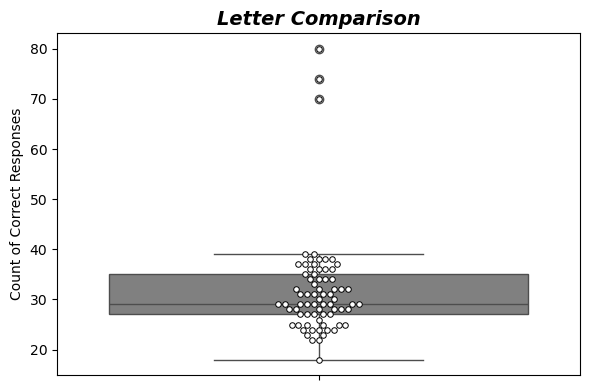

In [127]:
lc = load_task_data("LC", columns)
# plot count correct responses by individual for lc
# Count correct responses for each subject
lc_counts = lc.groupby('subjectID')['correct'].sum().reset_index()
# plot a box plot of lc_counts
plt.figure(figsize=(6, 4))
plt.figure(figsize=(6, 4))
sns.boxplot(y=lc_counts['correct'], color='grey')
# Add swarm plot to show individual data points with marker as o with white fill and black edge
sns.swarmplot(
    y=lc_counts['correct'], 
    color='white', 
    edgecolor='black', 
    linewidth=0.7,     # make the edge stand out
    s=4              # control marker size if needed
)
plt.title('Letter Comparison', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.ylabel('Count of Correct Responses')
plt.tight_layout()
plt.show()

Processing ../../../data/obs/UI/7049/DSST/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/DSST/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/DSST/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/DSST/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/DSST/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/DSST/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/DSST/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/DSST/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/DSST/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/DSST/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/DSST/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/DSST/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/DSST/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/DSST/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/DSST/data/7

<Figure size 600x400 with 0 Axes>

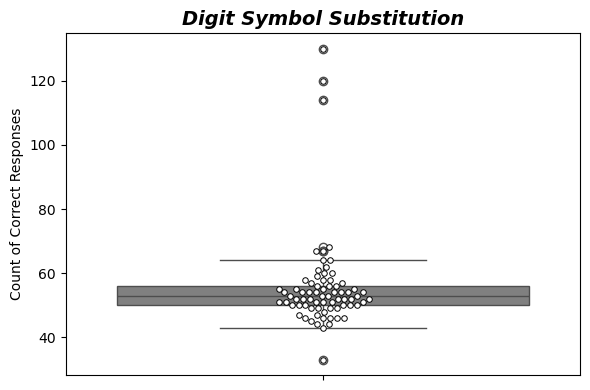

In [128]:
dsst = load_task_data("DSST", columns)
# plot count correct responses by individual for dsst
# Count correct responses for each subject
dsst_counts = dsst.groupby('subjectID')['correct'].sum().reset_index()
# plot a box plot of dsst_counts
plt.figure(figsize=(6, 4))
plt.figure(figsize=(6, 4))
sns.boxplot(y=dsst_counts['correct'], color='grey')
# Add swarm plot to show individual data points with marker as o with white fill and black edge
sns.swarmplot(
    y=dsst_counts['correct'], 
    color='white', 
    edgecolor='black', 
    linewidth=0.7,     # make the edge stand out
    s=4              # control marker size if needed
)
plt.title('Digit Symbol Substitution', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.ylabel('Count of Correct Responses')
plt.tight_layout()
plt.show()

In [131]:
fn = load_task_data("FN", columns)
# plot proportion correct responses by individual for fn
# Count correct responses for each subject
fn_counts = fn.groupby('subjectID')['correct'].sum().reset_index()
# Count total responses for each subject
fn_total = fn.groupby('subjectID')['correct'].count().reset_index()
# Merge counts and total responses
fn_summary = pd.merge(fn_counts, fn_total, on='subjectID', suffixes=('_correct', '_total'))
# Calculate proportion correct
fn_summary
fn_summary['proportion_correct'] = fn_summary['correct_correct'] / fn_summary['correct_total']
fn_summary
# plot a box plot of fn_summary


Processing ../../../data/obs/UI/7049/FN/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/FN/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/FN/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/FN/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/FN/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/FN/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/FN/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/FN/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/FN/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/FN/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/FN/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/FN/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/FN/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/FN/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/FN/data/7090_ses-1_cat-1.csv
Processing

,subjectID,correct_correct,correct_total,proportion_correct
0,7019,66,90,0.733333
1,7020,72,81,0.888889
2,7021,73,81,0.901235
3,7022,70,81,0.864198
4,7023,80,90,0.888889
...,...,...,...,...
69,9005,62,81,0.765432
70,9007,79,90,0.877778
71,9008,69,90,0.766667
72,9009,81,90,0.900000


<Figure size 600x400 with 0 Axes>

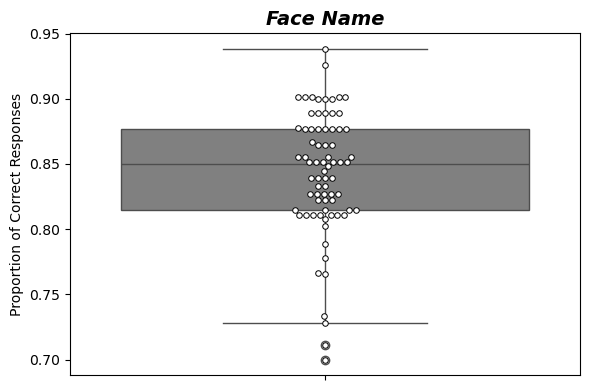

In [ ]:
#fn_summary['proportion_correct'] = fn_summary['correct'] / fn_summary['correct_total']
# plot a box plot of fn_summary
plt.figure(figsize=(6, 4))
plt.figure(figsize=(6, 4))
sns.boxplot(y=fn_summary['proportion_correct'], color='grey')
# Add swarm plot to show individual data points with marker as o with white fill and black edge
sns.swarmplot(
    y=fn_summary['proportion_correct'], 
    color='white', 
    edgecolor='black', 
    linewidth=0.7,     # make the edge stand out
    s=4,                # control marker size if needed
)
plt.title('Face Name', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.ylabel('Proportion of Correct Responses')
plt.tight_layout()
plt.show()

Processing ../../../data/obs/UI/7049/SM/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/SM/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/SM/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/SM/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/SM/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/SM/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/SM/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/SM/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/SM/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/SM/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/SM/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/SM/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/SM/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/SM/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/SM/data/7090_ses-1_cat-1.csv
Processing

<Figure size 600x400 with 0 Axes>

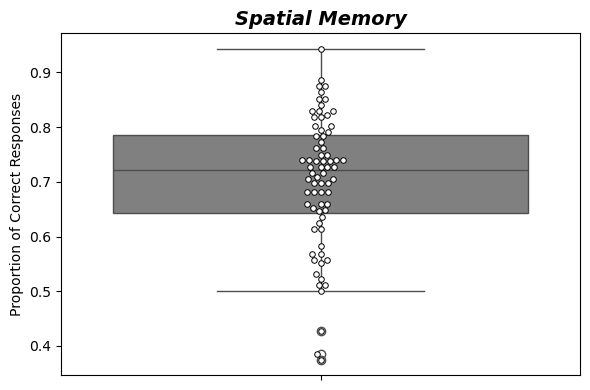

In [137]:
sm = load_task_data("SM", columns)
# plot proportion correct responses by individual for sm
# Count correct responses for each subject
sm_counts = sm.groupby('subjectID')['correct'].sum().reset_index()
# Count total responses for each subject
sm_total = sm.groupby('subjectID')['correct'].count().reset_index()
# Merge counts and total responses
sm_summary = pd.merge(sm_counts, sm_total, on='subjectID', suffixes=('_correct', '_total'))
# Calculate proportion correct
sm_summary['proportion_correct'] = sm_summary['correct_correct'] / sm_summary['correct_total']
# plot a box plot of sm_summary
plt.figure(figsize=(6, 4))
plt.figure(figsize=(6, 4))



sns.boxplot(y=sm_summary['proportion_correct'], color='grey')
# Add swarm plot to show individual data points with marker as o with white fill and black edge
sns.swarmplot(
    y=sm_summary['proportion_correct'], 
    color='white', 
    edgecolor='black', 
    linewidth=0.7,     # make the edge stand out
    s=4,                # control marker size if needed
)
plt.title('Spatial Memory', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.ylabel('Proportion of Correct Responses')
plt.tight_layout()
plt.show()


Processing ../../../data/obs/UI/7049/PC/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7047/PC/data/7047_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/PC/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/PC/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/PC/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/PC/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/PC/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/PC/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/PC/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/PC/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/PC/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/PC/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/PC/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/PC/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/PC/data/7090_ses-1_cat-1.csv
Processing

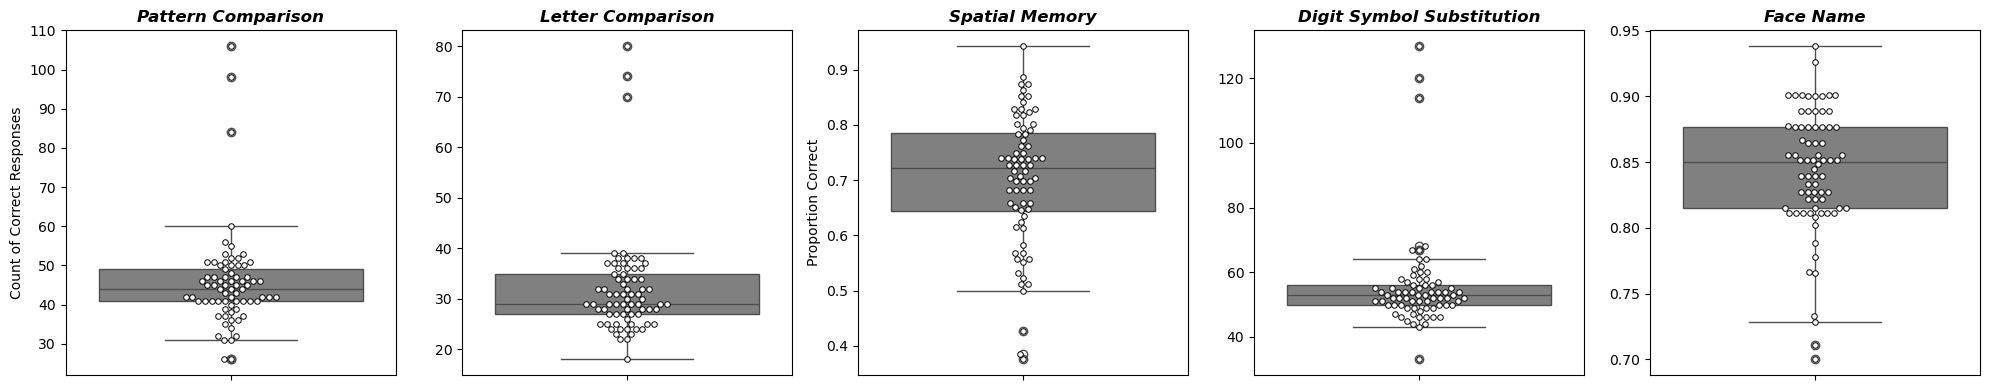

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns = ['correct']

# Load and process PC (Pattern Comparison)
pc_df = load_task_data("PC", columns)
pc_counts = pc_df.groupby('subjectID')['correct'].sum().reset_index()

# Load and process LC (Letter Comparison)
lc = load_task_data("LC", columns)
lc_counts = lc.groupby('subjectID')['correct'].sum().reset_index()

# Load and process SM (Spatial Memory)
sm = load_task_data("SM", columns)
sm_counts = sm.groupby('subjectID')['correct'].sum().reset_index()
sm_total = sm.groupby('subjectID')['correct'].count().reset_index()
sm_summary = pd.merge(sm_counts, sm_total, on='subjectID', suffixes=('_correct', '_total'))
sm_summary['proportion_correct'] = sm_summary['correct_correct'] / sm_summary['correct_total']

# Load and process DSST (Digit Symbol Substitution)
dsst = load_task_data("DSST", columns)
dsst_counts = dsst.groupby('subjectID')['correct'].sum().reset_index()

# Load and process FN (Face Name)
fn = load_task_data("FN", columns)
fn_counts = fn.groupby('subjectID')['correct'].sum().reset_index()
fn_total = fn.groupby('subjectID')['correct'].count().reset_index()
fn_summary = pd.merge(fn_counts, fn_total, on='subjectID', suffixes=('_correct', '_total'))
fn_summary['proportion_correct'] = fn_summary['correct_correct'] / fn_summary['correct_total']

# Setup figure
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=False)

# Plot 1: Pattern Comparison
sns.boxplot(y=pc_counts['correct'], ax=axs[0], color='grey')
sns.swarmplot(y=pc_counts['correct'], ax=axs[0], color='white', edgecolor='black', linewidth=0.7, s=4)
axs[0].set_title('Pattern Comparison', fontsize=12, fontweight='bold', style='italic')
axs[0].set_ylabel('Count of Correct Responses')

# Plot 2: Letter Comparison
sns.boxplot(y=lc_counts['correct'], ax=axs[1], color='grey')
sns.swarmplot(y=lc_counts['correct'], ax=axs[1], color='white', edgecolor='black', linewidth=0.7, s=4)
axs[1].set_title('Letter Comparison', fontsize=12, fontweight='bold', style='italic')
axs[1].set_ylabel('')

# Plot 3: Spatial Memory
sns.boxplot(y=sm_summary['proportion_correct'], ax=axs[2], color='grey')
sns.swarmplot(y=sm_summary['proportion_correct'], ax=axs[2], color='white', edgecolor='black', linewidth=0.7, s=4)
axs[2].set_title('Spatial Memory', fontsize=12, fontweight='bold', style='italic')
axs[2].set_ylabel('Proportion Correct')

# Plot 4: Digit Symbol Substitution
sns.boxplot(y=dsst_counts['correct'], ax=axs[3], color='grey')
sns.swarmplot(y=dsst_counts['correct'], ax=axs[3], color='white', edgecolor='black', linewidth=0.7, s=4)
axs[3].set_title('Digit Symbol Substitution', fontsize=12, fontweight='bold', style='italic')
axs[3].set_ylabel('')

# Plot 5: Face Name
sns.boxplot(y=fn_summary['proportion_correct'], ax=axs[4], color='grey')
sns.swarmplot(y=fn_summary['proportion_correct'], ax=axs[4], color='white', edgecolor='black', linewidth=0.7, s=4)
axs[4].set_title('Face Name', fontsize=12, fontweight='bold', style='italic')
axs[4].set_ylabel('')

plt.tight_layout()
plt.show()

In [150]:
ats = load_task_data('ATS', relevant_columns=['block_cond', 'con_img', 'response_time', 'correct'])
nts = load_task_data("NTS", relevant_columns=['block_cond', 'con_img', 'response_time', 'correct'])
nts

Processing ../../../data/obs/UI/7049/ATS/data/7049_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7040/ATS/data/7040_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7025/ATS/data/7025_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7022/ATS/data/7022_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7041/ATS/data/7041_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7046/ATS/data/7046_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7070/ATS/data/7070_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7023/ATS/data/7023_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7024/ATS/data/7024_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7037/ATS/data/7037_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7030/ATS/data/7030_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7039/ATS/data/7039_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7052/ATS/data/7052_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7090/ATS/data/7090_ses-1_cat-1.csv
Processing ../../../data/obs/UI/7097/ATS/data/7097_ses-1_cat-1

,subjectID,block_cond,con_img,response_time,correct
0,7049,A,circle.png,1514,0
1,7049,A,circle.png,1515,0
2,7049,A,circle.png,1325,1
3,7049,A,circle.png,569,1
4,7049,A,circle.png,734,1
...,...,...,...,...,...
13927,9002,C,triangle.png,1072,1
13928,9002,C,triangle.png,1305,0
13929,9002,C,circle.png,1227,1
13930,9002,C,triangle.png,1516,0


In [145]:
'''

Single, repeat, and switching cost for task switch paradigm

single -> means of A/B block_cond

in block C of block_cond:

    repeat is when con_img is the same for two in a row, take the latter response_time 
    switching is when there are two different values in block_cond, take the latter
    the first response_time in block_cond C should be ignored


'''



def compute_task_switch_costs(ats: pd.DataFrame) -> pd.DataFrame:
    """
    Compute task switch costs (single, repeat, switching) for each subject.
    
    Parameters:
    - ats: pd.DataFrame with columns: subject, block_cond, con_img, response_time.
      - 'block_cond' should contain values "A", "B", or "C".
      - For block_cond values "A" and "B", these trials are used to compute the 'single' cost.
      - For block_cond "C", the first trial is ignored, and:
            * Repeat trials are those where 'con_img' is the same as the previous trial (after ignoring the first).
            * Switching trials are those where 'con_img' is different from the previous trial.
      - For each subject, the mean response_time is calculated for single, repeat, and switching trials.
    
    Returns:
    - pd.DataFrame with each row corresponding to a subject and columns:
      'subject', 'single', 'repeat', 'switching'.
    """
    
    # List to store results for each subject.
    results = []
    
    # Iterate over groups for each subject.
    for subject, sub_df in ats.groupby("subjectID"):
        # 1. Compute "single" cost: mean response_time from trials where block_cond is A or B.
        ab_df = sub_df[sub_df["block_cond"].isin(["A", "B"])]
        single_mean = ab_df["response_time"].mean() if not ab_df.empty else None
        
        # 2. Compute "repeat" and "switching" costs from block_cond "C".
        # Filter for block C trials and sort by index to maintain trial order.
        c_df = sub_df[sub_df["block_cond"] == "C"].copy()
        c_df.sort_index(inplace=True)
        
        # If there are fewer than 2 trials in block C, we cannot compare consecutive trials.
        if c_df.shape[0] < 2:
            repeat_mean = None
            switching_mean = None
        else:
            # Create a new column with the previous trial's con_img to compare.
            c_df["prev_con_img"] = c_df["con_img"].shift(1)
            # Exclude the first trial since it does not have a valid previous trial.
            valid_trials = c_df.iloc[1:]
            # Identify repeat trials: where current con_img equals previous con_img.
            repeat_trials = valid_trials[valid_trials["con_img"] == valid_trials["prev_con_img"]]
            # Identify switching trials: where current con_img is different from previous.
            switching_trials = valid_trials[valid_trials["con_img"] != valid_trials["prev_con_img"]]
            
            # Compute mean response time for each.
            repeat_mean = repeat_trials["response_time"].mean() if not repeat_trials.empty else None
            switching_mean = switching_trials["response_time"].mean() if not switching_trials.empty else None
        
        results.append({
            "subject": subject,
            "single": single_mean,
            "repeat": repeat_mean,
            "switching": switching_mean
        })
    
    # Return the results as a new dataframe.
    return pd.DataFrame(results)

# Example usage:
# Assuming you have a dataframe 'ats' properly loaded
# result_df = compute_task_switch_costs(ats)
# print(result_df)

In [151]:
ats_ts = compute_task_switch_costs(ats)
nts_ts = compute_task_switch_costs(nts)
nts_ts


,subject,single,repeat,switching
0,7019,734.464286,1023.979167,1043.394366
1,7020,630.541667,941.687500,959.440678
2,7021,765.402778,1103.872727,1138.828125
3,7022,819.597222,1129.531915,1212.783333
4,7023,735.236111,946.034483,1071.344262
...,...,...,...,...
69,9004,749.625000,1131.517241,1289.983607
70,9005,855.000000,1038.600000,1246.734375
71,9007,919.708333,1145.115385,1321.018182
72,9008,596.902778,989.413793,962.213115


In [159]:
from scipy import stats

def compute_wide_cost_stats(df, cost_cols=["single", "repeat", "switching"]):
    """
    Computes the mean and 95% CI for each cost column (e.g. '# single', '# repeat', '# switching') 
    in a wide-format dataframe.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing columns for each cost type, e.g. '# single', '# repeat', and '# switching'.
    cost_cols : list of str
        The list of column names corresponding to each cost metric.

    Returns:
    --------
    pd.DataFrame
        A summary DataFrame with columns:
        - condition : the name of the cost column
        - mean      : the mean of that cost column
        - ci        : half-width of the 95% confidence interval
    """
    
    results = []
    
    for col in cost_cols:
        # Basic summary stats
        col_mean = df[col].mean()
        col_std = df[col].std()
        col_count = df[col].count()
        
        # Compute standard error: SE = std / sqrt(n)
        if col_count > 1:
            se = col_std / np.sqrt(col_count)
            # T multiplier for 95% CI
            t_val = stats.t.ppf(0.975, col_count - 1)
            ci = t_val * se
        else:
            # Not enough data to compute a CI
            ci = np.nan
        
        results.append({
            'condition': col,
            'mean': col_mean,
            'ci': ci
        })
    
    return pd.DataFrame(results)

# Example usage
# Suppose your DataFrame with columns ["subject", "# single", "# repeat", "# switching"] is called df
ats_summary = compute_wide_cost_stats(ats_ts, cost_cols=["single", "repeat", "switching"])
nts_summary = compute_wide_cost_stats(nts_ts)

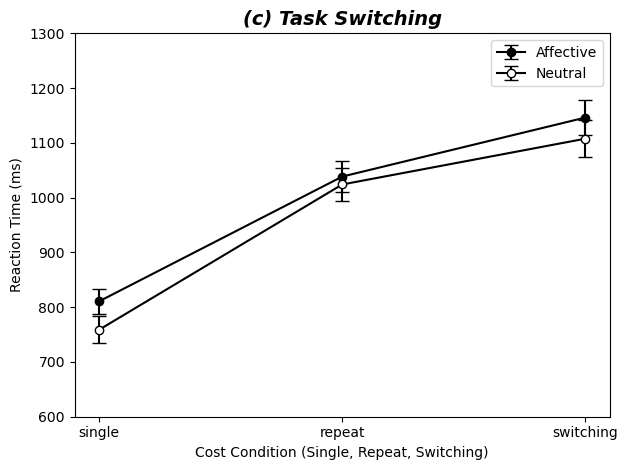

In [162]:

# Plot for Affective condition (using ats_ts)
plt.errorbar(ats_summary['condition'], ats_summary['mean'], yerr=ats_summary['ci'],
             fmt='o-', color='black', ecolor='black', capsize=5, label='Affective')

# Plot for Neutral condition (using nts_ts)
plt.errorbar(nts_summary['condition'], nts_summary['mean'], yerr=nts_summary['ci'],
             fmt='o-', markerfacecolor='white', markeredgecolor='black', color='black',
             ecolor='black', capsize=5, label='Neutral')

# Customize plot appearance
plt.title('(c) Task Switching', fontsize=14, fontweight='bold', loc='center', style='italic')
plt.xlabel('Cost Condition (Single, Repeat, Switching)')
plt.ylabel('Reaction Time (ms)')
plt.ylim(600, 1300)
plt.legend()
plt.tight_layout()
plt.show()

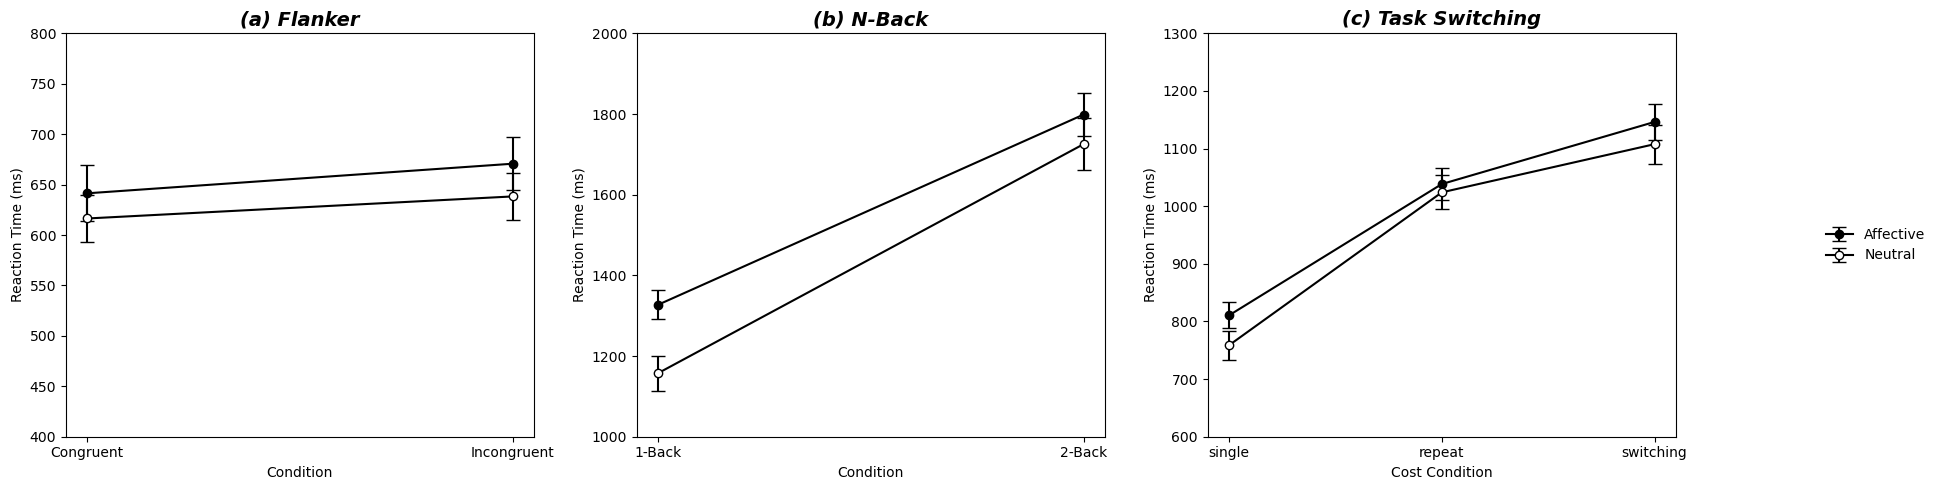

In [166]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# --- (a) Flanker ---
axes[0].errorbar(af_summary['condition'], af_summary['mean'], yerr=af_summary['ci'],
                 fmt='o-', color='black', ecolor='black', capsize=5, label='Affective')
axes[0].errorbar(nf_summary['condition'], nf_summary['mean'], yerr=nf_summary['ci'],
                 fmt='o-', markerfacecolor='white', markeredgecolor='black', color='black',
                 ecolor='black', capsize=5, label='Neutral')
axes[0].set_title('(a) Flanker', fontsize=14, fontweight='bold', style='italic')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Reaction Time (ms)')
axes[0].set_ylim(400, 800)

# --- (b) N-Back ---
axes[1].errorbar(vnb_summary['condition'], vnb_summary['mean'], yerr=vnb_summary['ci'],
                 fmt='o-', color='black', ecolor='black', capsize=5)
axes[1].errorbar(nnb_summary['condition'], nnb_summary['mean'], yerr=nnb_summary['ci'],
                 fmt='o-', markerfacecolor='white', markeredgecolor='black', color='black',
                 ecolor='black', capsize=5)
axes[1].set_title('(b) N-Back', fontsize=14, fontweight='bold', style='italic')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Reaction Time (ms)')
axes[1].set_ylim(1000, 2000)

# --- (c) Task Switching ---
aff_line = axes[2].errorbar(ats_summary['condition'], ats_summary['mean'], yerr=ats_summary['ci'],
                            fmt='o-', color='black', ecolor='black', capsize=5, label='Affective')
neu_line = axes[2].errorbar(nts_summary['condition'], nts_summary['mean'], yerr=nts_summary['ci'],
                            fmt='o-', markerfacecolor='white', markeredgecolor='black', color='black',
                            ecolor='black', capsize=5, label='Neutral')
axes[2].set_title('(c) Task Switching', fontsize=14, fontweight='bold', style='italic')
axes[2].set_xlabel('Cost Condition')
axes[2].set_ylabel('Reaction Time (ms)')
axes[2].set_ylim(600, 1300)

# Add a single legend outside the plots to the right of (c)
fig.legend(handles=[aff_line, neu_line], labels=['Affective', 'Neutral'],
           loc='center left', bbox_to_anchor=(1.01, 0.5), frameon=False)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()